In [38]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import community

# Read the dataset
df = pd.read_csv('Refugee_Migration.csv')


In [39]:
print(df.head())



   Year                                 Source  Value                Target  \
0  1980  Congo, the Democratic Republic of the  20000                Angola   
1  1980                                Namibia  50000                Angola   
2  1980                           South Africa   5000                Angola   
3  1980                            Afghanistan   1500  United Arab Emirates   
4  1980  Congo, the Democratic Republic of the  50750               Burundi   

   lat_dest  lon_dest  lat_org  lon_org    weight  
0     -12.5      18.5      0.0     25.0  0.616031  
1     -12.5      18.5    -22.0     17.0  0.704519  
2     -12.5      18.5    -29.0     24.0  0.465230  
3      24.0      54.0     33.0     65.0  0.312827  
4      -3.5      30.0      0.0     25.0  0.705894  


In [40]:
# Identify the column names for source, target, and weight
source_column = 'Source'  # Replace with the actual column name for the source nodes
target_column = 'Target'  # Replace with the actual column name for the target nodes
weight_column = 'weight'  # Replace with the actual column name for the edge weights


In [41]:
g_refugee = nx.from_pandas_edgelist(df, source=source_column, target=target_column, edge_attr=weight_column, create_using=nx.DiGraph())


In [42]:
# Use the largest weakly connected component
largest_cc = max(nx.weakly_connected_components(g_refugee), key=len)
g_refugee = g_refugee.subgraph(largest_cc)

In [43]:

# Community detection using Fast Greedy algorithm
g_refugee_fast = nx.algorithms.community.greedy_modularity_communities(g_refugee)
communities_fast = list(g_refugee_fast)

In [44]:
# Convert the directed graph to an undirected graph
g_undirected = g_refugee.to_undirected()

# Community detection using Walktrap algorithm
g_refugee_walktrap = nx.algorithms.community.asyn_fluidc(g_undirected, k=len(communities_fast))
communities_walktrap = list(g_refugee_walktrap)


In [45]:
# Convert the directed graph to an undirected graph
g_undirected = g_refugee.to_undirected()

# Community detection using Spinglass algorithm
g_refugee_spinglass = nx.algorithms.community.greedy_modularity_communities(g_undirected)
communities_spinglass = list(g_refugee_spinglass)


In [46]:
# Community detection using Girvan-Newman algorithm
g_refugee_gn = nx.algorithms.community.girvan_newman(g_refugee)
communities_gn = next(g_refugee_gn)

<ipython-input-47-899b7c8f6aea>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


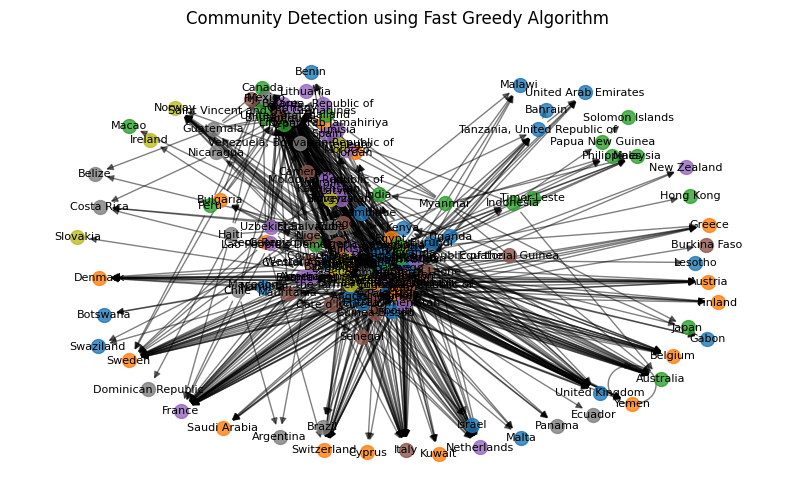

In [47]:
pos = nx.spring_layout(g_refugee)
plt.figure(figsize=(10, 6))

# Generate a color map for communities
cmap = plt.cm.get_cmap('tab10')
num_communities = len(communities_fast)
colors = [cmap(i / num_communities) for i in range(num_communities)]

for i, community in enumerate(communities_fast):
    nx.draw_networkx_nodes(g_refugee, pos, nodelist=community, node_color=colors[i], node_size=100, alpha=0.8)

nx.draw_networkx_edges(g_refugee, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(g_refugee, pos, font_size=8, font_color='black')
plt.title("Community Detection using Fast Greedy Algorithm")
plt.axis('off')
plt.show()


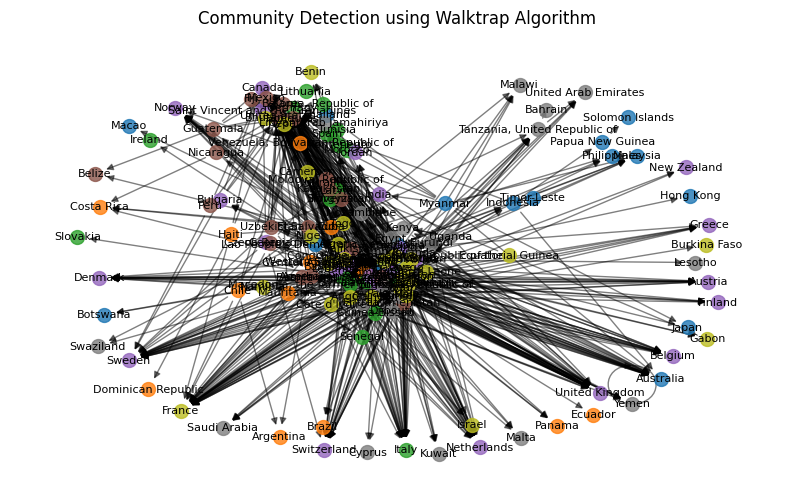

In [48]:
# Plotting the graph with communities (Walktrap)
plt.figure(figsize=(10, 6))
for i, community in enumerate(communities_walktrap):
    nx.draw_networkx_nodes(g_refugee, pos, nodelist=community, node_color=colors[i], node_size=100, alpha=0.8)
nx.draw_networkx_edges(g_refugee, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(g_refugee, pos, font_size=8, font_color='black')
plt.title("Community Detection using Walktrap Algorithm")
plt.axis('off')
plt.show()

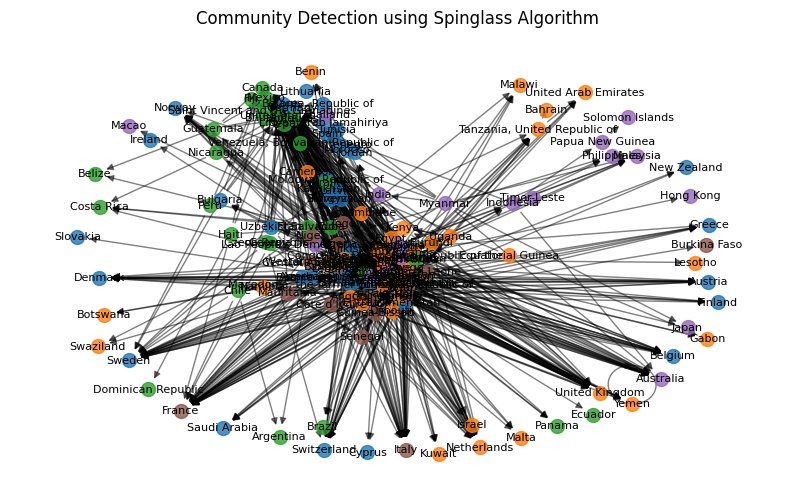

In [49]:
# Plotting the graph with communities (Spinglass)
plt.figure(figsize=(10, 6))
for i, community in enumerate(communities_spinglass):
    nx.draw_networkx_nodes(g_refugee, pos, nodelist=community, node_color=colors[i], node_size=100, alpha=0.8)
nx.draw_networkx_edges(g_refugee, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(g_refugee, pos, font_size=8, font_color='black')
plt.title("Community Detection using Spinglass Algorithm")
plt.axis('off')
plt.show()

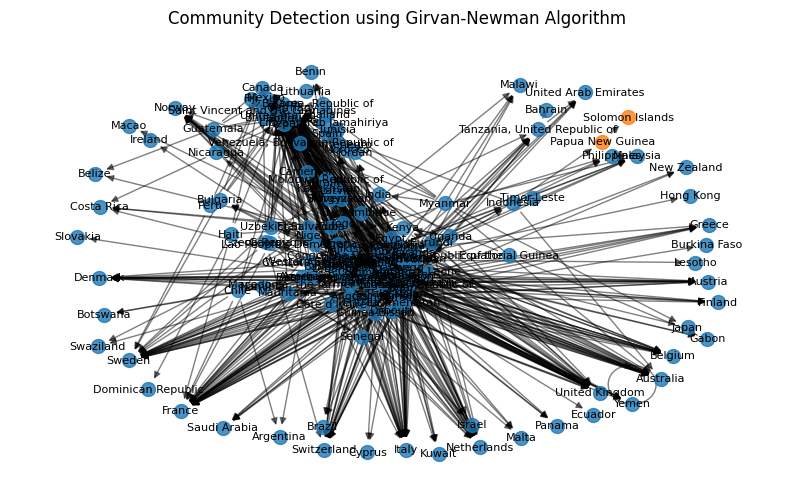

In [50]:
# Plotting the graph with communities (Girvan-Newman)
plt.figure(figsize=(10, 6))
for i, community in enumerate(communities_gn):
    nx.draw_networkx_nodes(g_refugee, pos, nodelist=community, node_color=colors[i], node_size=100, alpha=0.8)
nx.draw_networkx_edges(g_refugee, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(g_refugee, pos, font_size=8, font_color='black')
plt.title("Community Detection using Girvan-Newman Algorithm")
plt.axis('off')
plt.show()